In [1]:
?tensor_to_vec

Object `tensor_to_vec` not found.


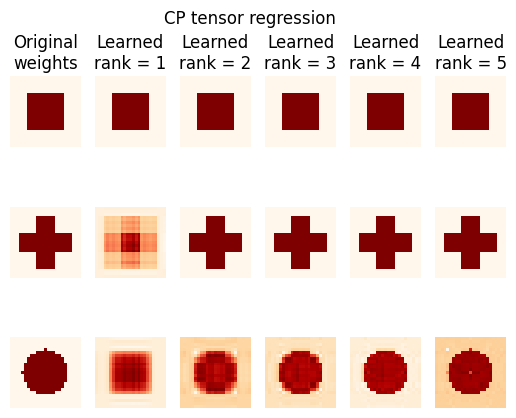

In [1]:
import matplotlib.pyplot as plt
from tensorly.base import tensor_to_vec, partial_tensor_to_vec
from tensorly.datasets.synthetic import gen_image
from tensorly.regression.cp_regression import CPRegressor
import tensorly as tl

# Parameter of the experiment
image_height = 25
image_width = 25
# shape of the images
patterns = ["rectangle", "swiss", "circle"]
# ranks to test
ranks = [1, 2, 3, 4, 5]

# Generate random samples
rng = tl.check_random_state(1)
X = tl.tensor(rng.normal(size=(1000, image_height, image_width), loc=0, scale=1))


# Parameters of the plot, deduced from the data
n_rows = len(patterns)
n_columns = len(ranks) + 1
# Plot the three images
fig = plt.figure()

for i, pattern in enumerate(patterns):

    # Generate the original image
    weight_img = gen_image(
        region=pattern, image_height=image_height, image_width=image_width
    )
    weight_img = tl.tensor(weight_img)

    # Generate the labels
    y = tl.dot(partial_tensor_to_vec(X, skip_begin=1), tensor_to_vec(weight_img))

    # Plot the original weights
    ax = fig.add_subplot(n_rows, n_columns, i * n_columns + 1)
    ax.imshow(tl.to_numpy(weight_img), cmap=plt.cm.OrRd, interpolation="nearest")
    ax.set_axis_off()
    if i == 0:
        ax.set_title("Original\nweights")

    for j, rank in enumerate(ranks):

        # Create a tensor Regressor estimator
        estimator = CPRegressor(
            weight_rank=rank, tol=10e-7, n_iter_max=100, reg_W=1, verbose=0
        )

        # Fit the estimator to the data
        estimator.fit(X, y)

        ax = fig.add_subplot(n_rows, n_columns, i * n_columns + j + 2)
        ax.imshow(
            tl.to_numpy(estimator.weight_tensor_),
            cmap=plt.cm.OrRd,
            interpolation="nearest",
        )
        ax.set_axis_off()

        if i == 0:
            ax.set_title(f"Learned\nrank = {rank}")

plt.suptitle("CP tensor regression")
plt.show()

In [2]:
?tensor_to_vec

Signature: tensor_to_vec(tensor)
Docstring:
Vectorises a tensor

Parameters
----------
tensor : ndarray
         tensor of shape ``(i_1, ..., i_n)``

Returns
-------
1D-array
    vectorised tensor of shape ``(i_1 * i_2 * ... * i_n)``
File:      ~/anaconda3/envs/spingnn/lib/python3.10/site-packages/tensorly/base.py
Type:      function

In [3]:
?partial_tensor_to_vec

Signature: partial_tensor_to_vec(tensor, skip_begin=1, skip_end=0)
Docstring:
Partially vectorises a tensor

    Partially vectorises a tensor while ignoring the specified dimension at the beginning and the end

Parameters
----------
tensor : ndarray
    tensor to partially vectorise
skip_begin : int, optional, default is 1
    number of dimensions to leave untouched at the beginning
skip_end : int, optional
    number of dimensions to leave untouched at the end

Returns
-------
ndarray
    partially vectorised tensor with the `skip_begin` first and `skip_end` last dimensions untouched
File:      ~/anaconda3/envs/spingnn/lib/python3.10/site-packages/tensorly/base.py
Type:      function

In [4]:
weight_img.shape

(25, 25)

fitting pattern n.0
fitting for rank = 1
fitting for rank = 2
fitting for rank = 3
fitting for rank = 4
fitting for rank = 5
fitting pattern n.1
fitting for rank = 1
fitting for rank = 2
fitting for rank = 3
fitting for rank = 4
fitting for rank = 5
fitting pattern n.2
fitting for rank = 1
fitting for rank = 2
fitting for rank = 3
fitting for rank = 4
fitting for rank = 5


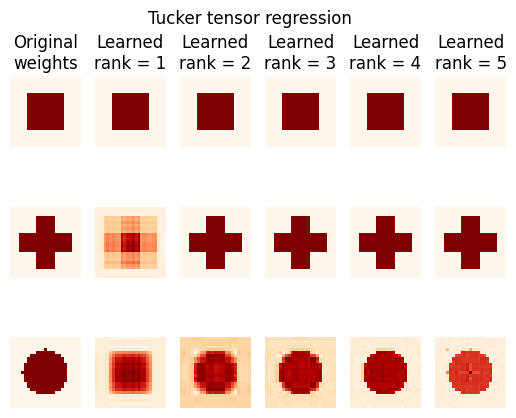

In [5]:
import matplotlib.pyplot as plt
from tensorly.base import tensor_to_vec, partial_tensor_to_vec
from tensorly.datasets.synthetic import gen_image
from tensorly.regression.tucker_regression import TuckerRegressor
import tensorly as tl

# Parameter of the experiment
image_height = 25
image_width = 25
# shape of the images
patterns = ["rectangle", "swiss", "circle"]
# ranks to test
ranks = [1, 2, 3, 4, 5]

# Generate random samples
rng = tl.check_random_state(1)
X = tl.tensor(rng.normal(size=(1000, image_height, image_width), loc=0, scale=1))

# Parameters of the plot, deduced from the data
n_rows = len(patterns)
n_columns = len(ranks) + 1
# Plot the three images
fig = plt.figure()

for i, pattern in enumerate(patterns):

    print(f"fitting pattern n.{i}")

    # Generate the original image
    weight_img = gen_image(
        region=pattern, image_height=image_height, image_width=image_width
    )
    weight_img = tl.tensor(weight_img)

    # Generate the labels
    y = tl.dot(partial_tensor_to_vec(X, skip_begin=1), tensor_to_vec(weight_img))

    # Plot the original weights
    ax = fig.add_subplot(n_rows, n_columns, i * n_columns + 1)
    ax.imshow(tl.to_numpy(weight_img), cmap=plt.cm.OrRd, interpolation="nearest")
    ax.set_axis_off()
    if i == 0:
        ax.set_title("Original\nweights")

    for j, rank in enumerate(ranks):
        print(f"fitting for rank = {rank}")

        # Create a tensor Regressor estimator
        estimator = TuckerRegressor(
            weight_ranks=[rank, rank], tol=10e-7, n_iter_max=100, reg_W=1, verbose=0
        )

        # Fit the estimator to the data
        estimator.fit(X, y)

        ax = fig.add_subplot(n_rows, n_columns, i * n_columns + j + 2)
        ax.imshow(
            tl.to_numpy(estimator.weight_tensor_),
            cmap=plt.cm.OrRd,
            interpolation="nearest",
        )
        ax.set_axis_off()

        if i == 0:
            ax.set_title(f"Learned\nrank = {rank}")

plt.suptitle("Tucker tensor regression")
plt.show()


In [6]:
import tensorly as tl
from tensorly.random import random_cp
from tensorly.cp_tensor import cp_permute_factors
import matplotlib.pyplot as plt

In [7]:
shape = (30, 40, 50)
rank = 4

# one reference cp tensor
cp_tensor_1 = random_cp(shape, rank)

# two target cp tensors
cp_tensor_2 = cp_tensor_1.cp_copy()
cp_tensor_3 = cp_tensor_1.cp_copy()

col_order_1 = [1, 0, 3, 2]
for f in range(3):
    cp_tensor_2.factors[f] = cp_tensor_2.factors[f][:, col_order_1]

col_order_2 = [3, 1, 2, 0]
for f in range(3):
    cp_tensor_3.factors[f] = cp_tensor_3.factors[f][:, col_order_2]

In [8]:
cp_tensors, permutation = cp_permute_factors(cp_tensor_1, [cp_tensor_2, cp_tensor_3])

In [9]:
print(permutation)

[array([1, 0, 3, 2]), array([3, 1, 2, 0])]


Text(0.5, 1.0, 'Permuted cp tensor')

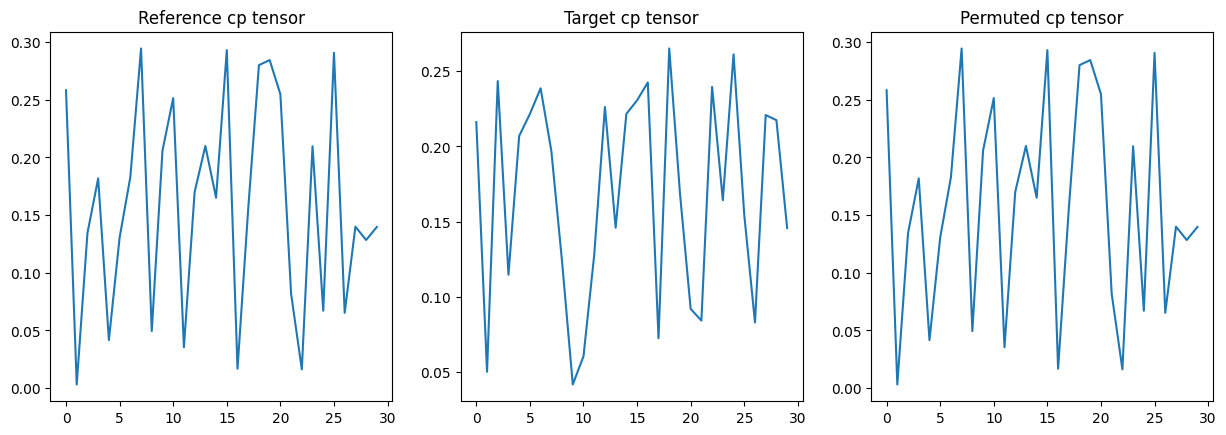

In [10]:
fig, axs = plt.subplots(1, 3)
plt.subplots_adjust(hspace=1.5)
fig.set_size_inches(15, fig.get_figheight(), forward=True)
axs[0].plot(cp_tensor_1.factors[0][:, 0].T)
axs[0].set_title("Reference cp tensor")
axs[1].plot(cp_tensor_2.factors[0][:, 0].T)
axs[1].set_title("Target cp tensor")
axs[2].plot(cp_tensors[0].factors[0][:, 0].T)
axs[2].set_title("Permuted cp tensor")

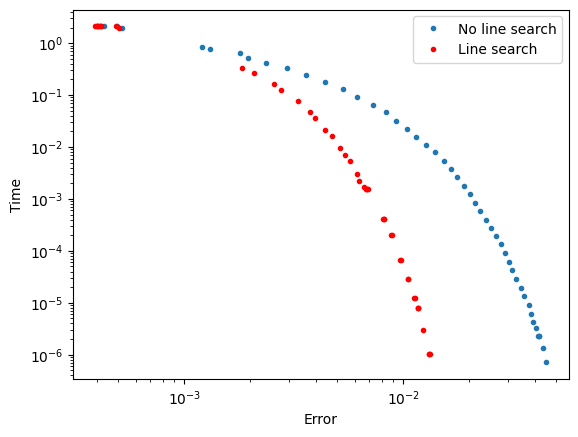

In [11]:
import matplotlib.pyplot as plt

from time import time
import numpy as np
import tensorly as tl
from tensorly.random import random_cp
from tensorly.decomposition import CP, parafac

tol = np.logspace(-1, -9)
err = np.empty_like(tol)
err_ls = np.empty_like(tol)
tt = np.empty_like(tol)
tt_ls = np.empty_like(tol)
tensor = random_cp((10, 10, 10), 3, random_state=1234, full=True)

# Get a high-accuracy decomposition for comparison
fac = parafac(tensor, rank=3, n_iter_max=2000000, tol=1.0e-15, linesearch=True)
err_min = tl.norm(tl.cp_to_tensor(fac) - tensor)

for ii, toll in enumerate(tol):
    # Run PARAFAC decomposition without line search and time
    start = time()
    cp = CP(rank=3, n_iter_max=2000000, tol=toll, linesearch=False)
    fac = cp.fit_transform(tensor)
    tt[ii] = time() - start
    err[ii] = tl.norm(tl.cp_to_tensor(fac) - tensor)

# Run PARAFAC decomposition with line search and time
for ii, toll in enumerate(tol):
    start = time()
    cp = CP(rank=3, n_iter_max=2000000, tol=toll, linesearch=True)
    fac_ls = cp.fit_transform(tensor)
    tt_ls[ii] = time() - start

    # Calculate the error of both decompositions
    err_ls[ii] = tl.norm(tl.cp_to_tensor(fac_ls) - tensor)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.loglog(tt, err - err_min, ".", label="No line search")
ax.loglog(tt_ls, err_ls - err_min, ".r", label="Line search")
ax.legend()
ax.set_ylabel("Time")
ax.set_xlabel("Error")

plt.show()

In [1]:
import numpy as np
import tensorly as tl
from tensorly.decomposition import constrained_parafac
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

# tensor generation
tensor = tl.tensor(np.random.rand(6, 8, 10))
rank = 3

In [2]:
_, factors = constrained_parafac(tensor, rank=rank, unimodality=True)

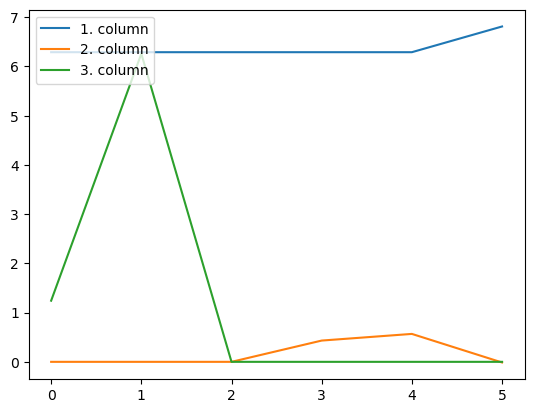

In [3]:
fig = plt.figure()
for i in range(rank):
    plt.plot(factors[0][:, i])
    plt.legend(["1. column", "2. column", "3. column"], loc="upper left")

In [4]:
_, factors = constrained_parafac(tensor, rank=rank, l1_reg=0.05)

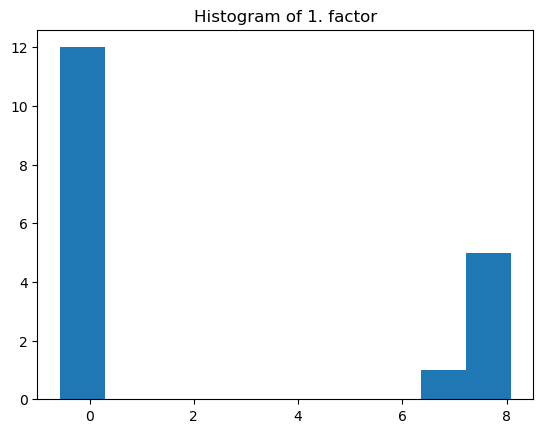

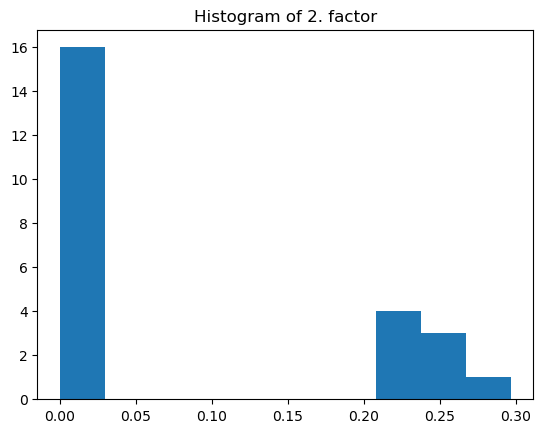

In [5]:
fig = plt.figure()
plt.title("Histogram of 1. factor")
_, _, _ = plt.hist(factors[0].flatten())

fig = plt.figure()
plt.title("Histogram of 2. factor")
_, _, _ = plt.hist(factors[1].flatten())

In [6]:
_, factors = constrained_parafac(tensor, rank=rank, non_negative={0: True, 2: True})
print("1. factor\n", factors[0])
print("2. factor\n", factors[1])
print("3. factor\n", factors[2])

1. factor
 [[5.59 0.   1.13]
 [5.17 0.01 1.07]
 [4.   0.87 0.44]
 [5.05 0.43 1.03]
 [2.85 1.42 0.  ]
 [4.51 0.7  0.85]]
2. factor
 [[ 0.62 -0.29 -1.27]
 [ 0.45  0.38 -0.61]
 [ 0.07  0.69  0.85]
 [ 0.42  0.07 -0.54]
 [ 0.34  0.51 -0.29]
 [ 0.23  0.38  0.15]
 [ 0.56 -0.42 -0.88]
 [ 0.07  0.96  0.96]]
3. factor
 [[0.34 0.3  0.57]
 [0.35 0.42 0.67]
 [0.31 0.48 0.42]
 [0.31 0.03 0.48]
 [0.36 0.49 0.19]
 [0.3  0.62 0.35]
 [0.33 0.24 0.3 ]
 [0.38 0.14 0.65]
 [0.35 0.36 0.51]
 [0.38 0.   0.59]]


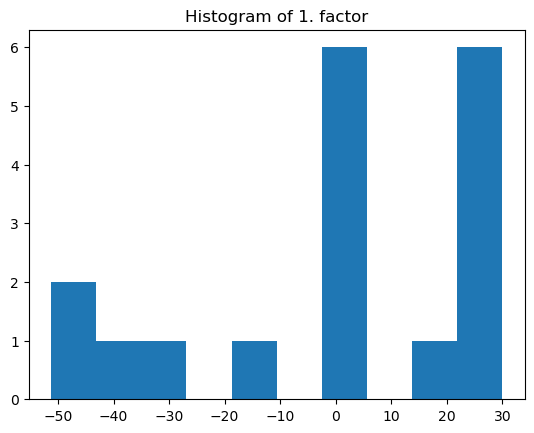

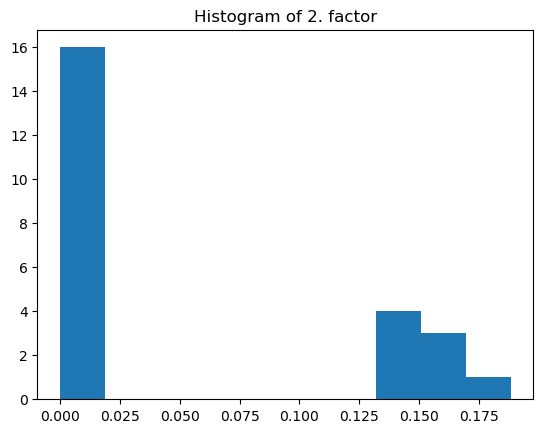

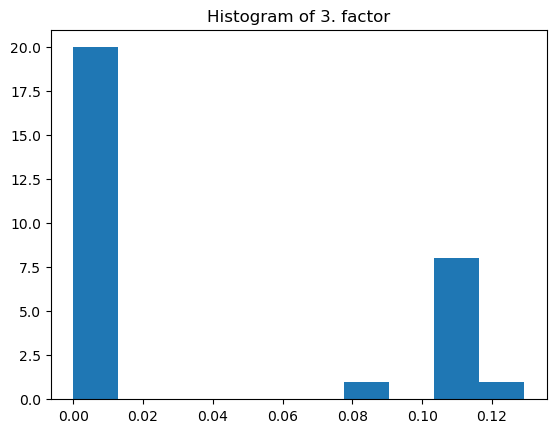

In [7]:
_, factors = constrained_parafac(tensor, rank=rank, l1_reg=[0.01, 0.02, 0.03])

fig = plt.figure()
plt.title("Histogram of 1. factor")
_, _, _ = plt.hist(factors[0].flatten())

fig = plt.figure()
plt.title("Histogram of 2. factor")
_, _, _ = plt.hist(factors[1].flatten())

fig = plt.figure()
plt.title("Histogram of 3. factor")
_, _, _ = plt.hist(factors[2].flatten())

In [8]:
_, factors = constrained_parafac(
    tensor, rank=rank, non_negative={1: True}, l1_reg={0: 0.01}, l2_square_reg={2: 0.01}
)

In [9]:
print("1. factor\n", factors[0])
print("2. factor\n", factors[1])
print("3. factor\n", factors[2])


1. factor
 [[ 17.32 -10.96  -0.26]
 [ 16.02 -10.7   -0.  ]
 [ 14.17  -4.6   -5.98]
 [ 13.44  -2.1  -10.64]
 [ 11.72   8.34 -14.61]
 [ 12.29  -0.93 -11.99]]
2. factor
 [[4.31e-01 0.00e+00 1.02e-04]
 [4.29e-01 8.44e-03 3.36e-01]
 [1.91e-01 1.11e+00 9.07e-01]
 [3.67e-01 4.70e-02 3.01e-01]
 [3.33e-01 9.57e-03 6.69e-01]
 [2.94e-01 3.49e-01 5.52e-01]
 [4.53e-01 0.00e+00 1.15e-02]
 [2.26e-01 1.07e+00 1.11e+00]]
3. factor
 [[ 0.06 -0.05 -0.04]
 [ 0.05 -0.05 -0.06]
 [ 0.07 -0.03 -0.04]
 [ 0.06 -0.03 -0.02]
 [ 0.11  0.01 -0.02]
 [ 0.07 -0.02 -0.05]
 [ 0.09 -0.01 -0.02]
 [ 0.07 -0.05 -0.03]
 [ 0.07 -0.04 -0.04]
 [ 0.08 -0.03 -0.02]]


In [10]:
import numpy as np
import tensorly as tl
from tensorly.decomposition import non_negative_tucker, non_negative_tucker_hals
import time
from tensorly.metrics.regression import RMSE
import matplotlib.pyplot as plt

In [11]:
# tensor generation
array = np.random.randint(1000, size=(10, 30, 40))
tensor = tl.tensor(array, dtype="float")

In [12]:
tic = time.time()
tensor_mu, error_mu = non_negative_tucker(
    tensor, rank=[5, 5, 5], tol=1e-12, n_iter_max=100, return_errors=True
)
tucker_reconstruction_mu = tl.tucker_to_tensor(tensor_mu)
time_mu = time.time() - tic

In [13]:
ticnew = time.time()
tensor_hals_fista, error_fista = non_negative_tucker_hals(
    tensor, rank=[5, 5, 5], algorithm="fista", return_errors=True
)
tucker_reconstruction_fista = tl.tucker_to_tensor(tensor_hals_fista)
time_fista = time.time() - ticnew

In [14]:
ticnew = time.time()
tensor_hals_as, error_as = non_negative_tucker_hals(
    tensor, rank=[5, 5, 5], algorithm="active_set", return_errors=True
)
tucker_reconstruction_as = tl.tucker_to_tensor(tensor_hals_as)
time_as = time.time() - ticnew

In [15]:
print("time for tensorly nntucker:" + " " + str(f"{time_mu:.2f}"))
print("time for HALS with fista:" + " " + str(f"{time_fista:.2f}"))
print("time for HALS with as:" + " " + str(f"{time_as:.2f}"))


time for tensorly nntucker: 0.08
time for HALS with fista: 5.64
time for HALS with as: 3.37


In [16]:
print("RMSE tensorly nntucker:" + " " + str(RMSE(tensor, tucker_reconstruction_mu)))
print(
    "RMSE for hals with fista:" + " " + str(RMSE(tensor, tucker_reconstruction_fista))
)
print("RMSE for hals with as:" + " " + str(RMSE(tensor, tucker_reconstruction_as)))

RMSE tensorly nntucker: 285.58572836503015
RMSE for hals with fista: 280.5284037190979
RMSE for hals with as: 283.73403165397343


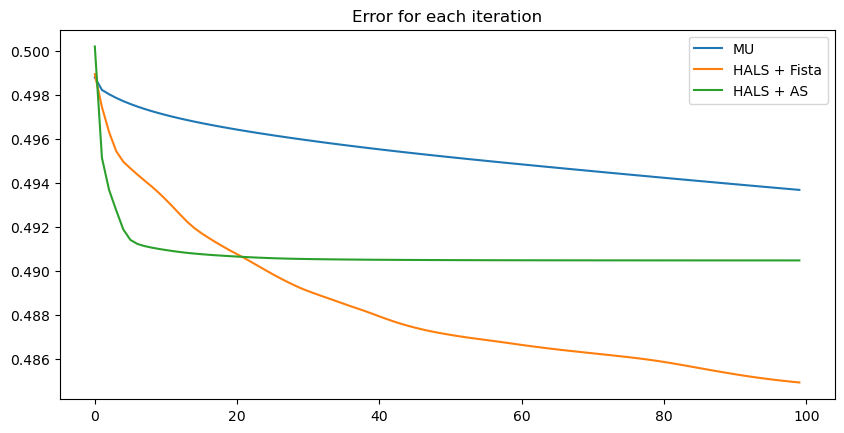

In [17]:
def each_iteration(a, b, c, title):
    fig = plt.figure()
    fig.set_size_inches(10, fig.get_figheight(), forward=True)
    plt.plot(a)
    plt.plot(b)
    plt.plot(c)
    plt.title(str(title))
    plt.legend(["MU", "HALS + Fista", "HALS + AS"], loc="upper right")


each_iteration(error_mu, error_fista, error_as, "Error for each iteration")

In [18]:
import numpy as np
import tensorly as tl
from tensorly.decomposition import non_negative_parafac, non_negative_parafac_hals
from tensorly.decomposition._cp import initialize_cp
from tensorly.cp_tensor import CPTensor
import time
from copy import deepcopy

In [19]:
# Tensor generation
tensor = tl.tensor(np.arange(24000).reshape((30, 40, 20)), dtype=tl.float32)

In [20]:
weights_init, factors_init = initialize_cp(
    tensor, non_negative=True, init="random", rank=10
)

cp_init = CPTensor((weights_init, factors_init))

In [21]:
tic = time.time()
tensor_mu, errors_mu = non_negative_parafac(
    tensor, rank=10, init=deepcopy(cp_init), return_errors=True
)
cp_reconstruction_mu = tl.cp_to_tensor(tensor_mu)
time_mu = time.time() - tic

In [22]:
print("reconstructed tensor\n", cp_reconstruction_mu[10:12, 10:12, 10:12], "\n")
print("input data tensor\n", tensor[10:12, 10:12, 10:12])

reconstructed tensor
 [[[8302.8  8113.34]
  [8211.09 8344.75]]

 [[8906.85 8962.77]
  [9151.47 9414.04]]] 

input data tensor
 [[[8210. 8211.]
  [8230. 8231.]]

 [[9010. 9011.]
  [9030. 9031.]]]


In [23]:
tic = time.time()
tensor_hals, errors_hals = non_negative_parafac_hals(
    tensor, rank=10, init=deepcopy(cp_init), return_errors=True
)
cp_reconstruction_hals = tl.cp_to_tensor(tensor_hals)
time_hals = time.time() - tic

In [24]:
print("reconstructed tensor\n", cp_reconstruction_hals[10:12, 10:12, 10:12], "\n")
print("input data tensor\n", tensor[10:12, 10:12, 10:12])

reconstructed tensor
 [[[8208.97 8211.88]
  [8229.09 8231.87]]

 [[9009.01 9011.65]
  [9029.13 9031.65]]] 

input data tensor
 [[[8210. 8211.]
  [8230. 8231.]]

 [[9010. 9011.]
  [9030. 9031.]]]


In [27]:
tic = time.time()
tensorhals_exact, errors_exact = non_negative_parafac_hals(
    tensor, rank=10, init=deepcopy(cp_init), return_errors=True, exact=False
)
cp_reconstruction_exact_hals = tl.cp_to_tensor(tensorhals_exact)
time_exact_hals = time.time() - tic

In [28]:
print(str(f"{time_mu:.2f}") + " " + "seconds")
print(str(f"{time_hals:.2f}") + " " + "seconds")
print(str(f"{time_exact_hals:.2f}") + " " + "seconds")

0.05 seconds
0.78 seconds
0.77 seconds


In [29]:
from tensorly.metrics.regression import RMSE

print(RMSE(tensor, cp_reconstruction_mu))
print(RMSE(tensor, cp_reconstruction_hals))
print(RMSE(tensor, cp_reconstruction_exact_hals))

236.91537
4.6991
4.6991


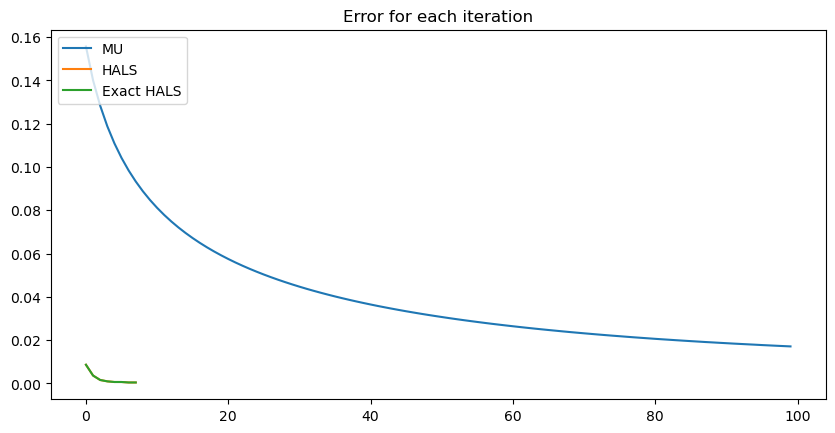

In [30]:
import matplotlib.pyplot as plt


def each_iteration(a, b, c, title):
    fig = plt.figure()
    fig.set_size_inches(10, fig.get_figheight(), forward=True)
    plt.plot(a)
    plt.plot(b)
    plt.plot(c)
    plt.title(str(title))
    plt.legend(["MU", "HALS", "Exact HALS"], loc="upper left")


each_iteration(errors_mu, errors_hals, errors_exact, "Error for each iteration")

In [31]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import tensorly as tl
from tensorly.decomposition import parafac2
from scipy.optimize import linear_sum_assignment

In [32]:
# Set parameters
true_rank = 3
I, J, K = 30, 40, 20
noise_rate = 0.1
np.random.seed(0)

# Generate random matrices
A_factor_matrix = np.random.uniform(1, 2, size=(I, true_rank))
B_factor_matrix = np.random.uniform(size=(J, true_rank))
C_factor_matrix = np.random.uniform(size=(K, true_rank))

# Normalised factor matrices
A_normalised = A_factor_matrix / la.norm(A_factor_matrix, axis=0)
B_normalised = B_factor_matrix / la.norm(B_factor_matrix, axis=0)
C_normalised = C_factor_matrix / la.norm(C_factor_matrix, axis=0)

# Generate the shifted factor matrix
B_factor_matrices = [np.roll(B_factor_matrix, shift=i, axis=0) for i in range(I)]
Bs_normalised = [np.roll(B_normalised, shift=i, axis=0) for i in range(I)]

# Construct the tensor
tensor = np.einsum(
    "ir,ijr,kr->ijk", A_factor_matrix, B_factor_matrices, C_factor_matrix
)

# Add noise
noise = np.random.standard_normal(tensor.shape)
noise /= np.linalg.norm(noise)
noise *= noise_rate * np.linalg.norm(tensor)
tensor += noise

In [33]:
best_err = np.inf
decomposition = None

for run in range(10):
    print(f"Training model {run}...")
    trial_decomposition, trial_errs = parafac2(
        tensor,
        true_rank,
        return_errors=True,
        tol=1e-8,
        n_iter_max=500,
        random_state=run,
    )
    print(f"Number of iterations: {len(trial_errs)}")
    print(f"Final error: {trial_errs[-1]}")
    if best_err > trial_errs[-1]:
        best_err = trial_errs[-1]
        err = trial_errs
        decomposition = trial_decomposition
    print("-------------------------------")
print(f"Best model error: {best_err}")

Training model 0...
Number of iterations: 80
Final error: 0.09204695261872768
-------------------------------
Training model 1...
Number of iterations: 81
Final error: 0.09204698427747768
-------------------------------
Training model 2...
Number of iterations: 70
Final error: 0.09269724856848771
-------------------------------
Training model 3...
Number of iterations: 44
Final error: 0.09204719323465413
-------------------------------
Training model 4...
Number of iterations: 46
Final error: 0.09204725131428858
-------------------------------
Training model 5...
Number of iterations: 129
Final error: 0.09290580705038641
-------------------------------
Training model 6...
Number of iterations: 47
Final error: 0.09204716605012098
-------------------------------
Training model 7...
Number of iterations: 47
Final error: 0.09204714361493667
-------------------------------
Training model 8...
Number of iterations: 47
Final error: 0.09204753429647208
-------------------------------
Training 

In [34]:
est_tensor = tl.parafac2_tensor.parafac2_to_tensor(decomposition)
est_weights, (est_A, est_B, est_C) = tl.parafac2_tensor.apply_parafac2_projections(
    decomposition
)

In [35]:
reconstruction_error = la.norm(est_tensor - tensor)
recovery_rate = 1 - reconstruction_error / la.norm(tensor)

print(
    f"{recovery_rate:2.0%} of the data is explained by the model, which is expected with noise rate: {noise_rate}"
)


# To evaluate how well the original structure is recovered, we calculate the tucker congruence coefficient.

est_A, est_projected_Bs, est_C = tl.parafac2_tensor.apply_parafac2_projections(
    decomposition
)[1]

sign = np.sign(est_A)
est_A = np.abs(est_A)
est_projected_Bs = sign[:, np.newaxis] * est_projected_Bs

est_A_normalised = est_A / la.norm(est_A, axis=0)
est_Bs_normalised = [est_B / la.norm(est_B, axis=0) for est_B in est_projected_Bs]
est_C_normalised = est_C / la.norm(est_C, axis=0)

B_corr = (
    np.array(est_Bs_normalised).reshape(-1, true_rank).T
    @ np.array(Bs_normalised).reshape(-1, true_rank)
    / len(est_Bs_normalised)
)
A_corr = est_A_normalised.T @ A_normalised
C_corr = est_C_normalised.T @ C_normalised

corr = A_corr * B_corr * C_corr
permutation = linear_sum_assignment(
    -corr
)  # Old versions of scipy does not support maximising, from scipy v1.4, you can pass `corr` and `maximize=True` instead of `-corr` to maximise the sum.

congruence_coefficient = np.mean(corr[permutation])
print(f"Average tucker congruence coefficient: {congruence_coefficient}")

91% of the data is explained by the model, which is expected with noise rate: 0.1
Average tucker congruence coefficient: 0.9945618721597689


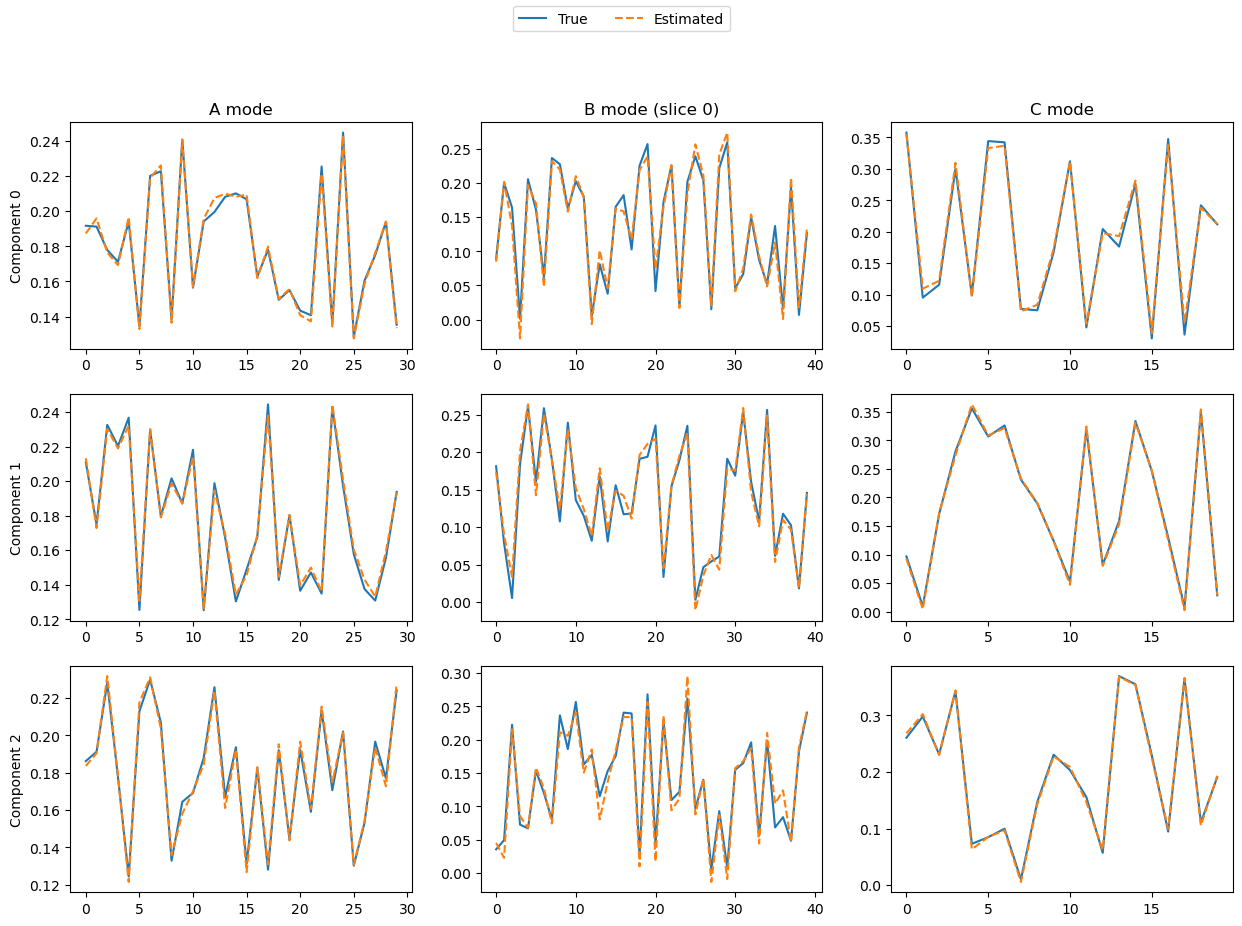

In [36]:
# Find the best permutation so that we can plot the estimated components on top of the true components
permutation = np.argmax(A_corr * B_corr * C_corr, axis=0)


# Create plots of each component vector for each mode
# (We just look at one of the B_i matrices)

fig, axes = plt.subplots(true_rank, 3, figsize=(15, 3 * true_rank + 1))
i = 0  # What slice, B_i, we look at for the B mode

for r in range(true_rank):

    # Plot true and estimated components for mode A
    axes[r][0].plot((A_normalised[:, r]), label="True")
    axes[r][0].plot((est_A_normalised[:, permutation[r]]), "--", label="Estimated")

    # Labels for the different components
    axes[r][0].set_ylabel(f"Component {r}")

    # Plot true and estimated components for mode C
    axes[r][2].plot(C_normalised[:, r])
    axes[r][2].plot(est_C_normalised[:, permutation[r]], "--")

    # Plot true components for mode B
    axes[r][1].plot(Bs_normalised[i][:, r])

    # Get the signs so that we can flip the B mode factor matrices
    A_sign = np.sign(est_A_normalised)

    # Plot estimated components for mode B (after sign correction)
    axes[r][1].plot(A_sign[i, r] * est_Bs_normalised[i][:, permutation[r]], "--")

# Titles for the different modes
axes[0][0].set_title("A mode")
axes[0][2].set_title("C mode")
axes[0][1].set_title(f"B mode (slice {i})")

# Create a legend for the entire figure
handles, labels = axes[r][0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2)

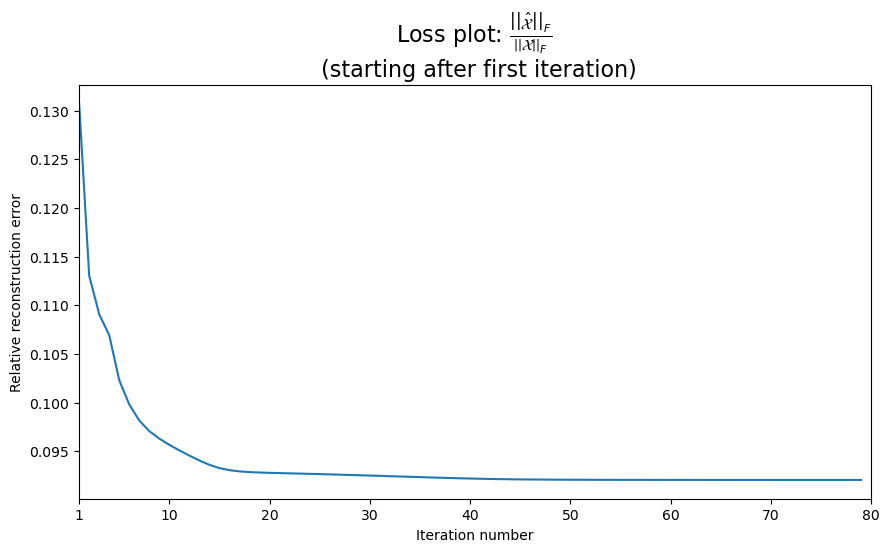

In [37]:
loss_fig, loss_ax = plt.subplots(figsize=(9, 9 / 1.6))
loss_ax.plot(range(1, len(err)), err[1:])
loss_ax.set_xlabel("Iteration number")
loss_ax.set_ylabel("Relative reconstruction error")
mathematical_expression_of_loss = r"$\frac{\left|\left|\hat{\mathcal{X}}\right|\right|_F}{\left|\left|\mathcal{X}\right|\right|_F}$"
loss_ax.set_title(
    f"Loss plot: {mathematical_expression_of_loss} \n (starting after first iteration)",
    fontsize=16,
)
xticks = loss_ax.get_xticks()
loss_ax.set_xticks([1] + list(xticks[1:]))
loss_ax.set_xlim(1, len(err))
plt.tight_layout()
plt.show()

In [38]:
from time import monotonic
import tensorly as tl
from tensorly.decomposition import parafac2
import tensorly.preprocessing as preprocessing

In [39]:
rng = tl.check_random_state(0)


def create_random_data(shape, rank, noise_level):
    I, J, K = shape  # noqa: E741
    pf2 = tl.random.random_parafac2(
        [(J, K) for i in range(I)], rank=rank, random_state=rng
    )

    X = pf2.to_tensor()
    X_norm = [tl.norm(Xi) for Xi in X]

    noise = [rng.standard_normal((J, K)) for i in range(I)]
    noise = [noise_level * X_norm[i] / tl.norm(E_i) for i, E_i in enumerate(noise)]
    return [X_i + E_i for X_i, E_i in zip(X, noise)]

In [43]:
n_inits = 5
rank = 3
shape = (10, 100, 15)  # 10 matrices/tensor slices, each of size 10_000 x 15.
noise_level = 0.33

uncompressed_data = create_random_data(shape, rank=rank, noise_level=noise_level)

In [45]:
print("Fitting PARAFAC2 model without compression...")
t1 = monotonic()
lowest_error = float("inf")
for i in range(n_inits):
    print(i)
    pf2, errs = parafac2(
        uncompressed_data,
        rank,
        n_iter_max=1000,
        nn_modes=[0],
        random_state=rng,
        return_errors=True,
    )
    if errs[-1] < lowest_error:
        pf2_full, errs_full = pf2, errs
t2 = monotonic()
print(
    f"It took {t2 - t1:.1f}s to fit a PARAFAC2 model a tensor of shape {shape} "
    + "without compression"
)

Fitting PARAFAC2 model without compression...
0
1
2
3
4
It took 75.9s to fit a PARAFAC2 model a tensor of shape (10, 100, 15) without compression


In [47]:
print("Fitting PARAFAC2 model with SVD compression...")
t1 = monotonic()
lowest_error = float("inf")
scores, loadings = preprocessing.svd_compress_tensor_slices(uncompressed_data)
t2 = monotonic()
for i in range(n_inits):
    print(i)
    pf2, errs = parafac2(
        scores,
        rank,
        n_iter_max=1000,
        nn_modes=[0],
        random_state=rng,
        return_errors=True,
    )
    if errs[-1] < lowest_error:
        pf2_compressed, errs_compressed = pf2, errs
pf2_decompressed = preprocessing.svd_decompress_parafac2_tensor(
    pf2_compressed, loadings
)
t3 = monotonic()
print(
    f"It took {t3 - t1:.1f}s to fit a PARAFAC2 model a tensor of shape {shape} "
    + "with lossless SVD compression"
)
print(f"The compression took {t2 - t1:.1f}s and the fitting took {t3 - t2:.1f}s")

Fitting PARAFAC2 model with SVD compression...
0
1
2
3
4
It took 57.3s to fit a PARAFAC2 model a tensor of shape (10, 100, 15) with lossless SVD compression
The compression took 0.0s and the fitting took 57.3s


In [48]:
print("Fitting PARAFAC2 model with lossy SVD compression...")
t1 = monotonic()
lowest_error = float("inf")
scores, loadings = preprocessing.svd_compress_tensor_slices(uncompressed_data, 1e-5)
t2 = monotonic()
for i in range(n_inits):
    print(i)
    pf2, errs = parafac2(
        scores,
        rank,
        n_iter_max=1000,
        nn_modes=[0],
        random_state=rng,
        return_errors=True,
    )
    if errs[-1] < lowest_error:
        pf2_compressed_lossy, errs_compressed_lossy = pf2, errs
pf2_decompressed_lossy = preprocessing.svd_decompress_parafac2_tensor(
    pf2_compressed_lossy, loadings
)
t3 = monotonic()
print(
    f"It took {t3 - t1:.1f}s to fit a PARAFAC2 model a tensor of shape {shape} "
    + "with lossy SVD compression"
)
print(
    f"Of which the compression took {t2 - t1:.1f}s and the fitting took {t3 - t2:.1f}s"
)

Fitting PARAFAC2 model with lossy SVD compression...
0
1
2
3
4
It took 62.1s to fit a PARAFAC2 model a tensor of shape (10, 100, 15) with lossy SVD compression
Of which the compression took 0.0s and the fitting took 62.1s


In [55]:
rank = 3
shape = (10, 2000, 2000)
noise_level = 0.33

uncompressed_data = create_random_data(shape, rank=rank, noise_level=noise_level)

In [51]:
print("Fitting PARAFAC2 model without compression...")
t1 = monotonic()
lowest_error = float("inf")
for i in range(n_inits):
    print(i)
    pf2, errs = parafac2(
        uncompressed_data,
        rank,
        n_iter_max=1000,
        nn_modes=[0],
        random_state=rng,
        return_errors=True,
    )
    if errs[-1] < lowest_error:
        pf2_full, errs_full = pf2, errs
t2 = monotonic()
print(
    f"It took {t2 - t1:.1f}s to fit a PARAFAC2 model a tensor of shape {shape} "
    + "without compression"
)

Fitting PARAFAC2 model without compression...
0
1
2
3
4
It took 16.6s to fit a PARAFAC2 model a tensor of shape (10, 200, 200) without compression


In [53]:
print("Fitting PARAFAC2 model with SVD compression...")
t1 = monotonic()
lowest_error = float("inf")
scores, loadings = preprocessing.svd_compress_tensor_slices(uncompressed_data)
t2 = monotonic()
for i in range(n_inits):
    print(i)
    pf2, errs = parafac2(
        scores,
        rank,
        n_iter_max=1000,
        nn_modes=[0],
        random_state=rng,
        return_errors=True,
    )
    if errs[-1] < lowest_error:
        pf2_compressed, errs_compressed = pf2, errs
pf2_decompressed = preprocessing.svd_decompress_parafac2_tensor(
    pf2_compressed, loadings
)
t3 = monotonic()
print(
    f"It took {t3 - t1:.1f}s to fit a PARAFAC2 model a tensor of shape {shape} "
    + "with lossless SVD compression"
)
print(
    f"Of which the compression took {t2 - t1:.1f}s and the fitting took {t3 - t2:.1f}s"
)

Fitting PARAFAC2 model with SVD compression...
0
1
2
3
4
It took 29.9s to fit a PARAFAC2 model a tensor of shape (10, 200, 200) with lossless SVD compression
Of which the compression took 0.0s and the fitting took 29.9s


In [56]:
print("Fitting PARAFAC2 model with lossy SVD compression...")
t1 = monotonic()
lowest_error = float("inf")
scores, loadings = preprocessing.svd_compress_tensor_slices(uncompressed_data, 1e-5)
t2 = monotonic()
for i in range(n_inits):
    print(i)
    pf2, errs = parafac2(
        scores,
        rank,
        n_iter_max=1000,
        nn_modes=[0],
        random_state=rng,
        return_errors=True,
    )
    if errs[-1] < lowest_error:
        pf2_compressed_lossy, errs_compressed_lossy = pf2, errs
pf2_decompressed_lossy = preprocessing.svd_decompress_parafac2_tensor(
    pf2_compressed_lossy, loadings
)
t3 = monotonic()
print(
    f"It took {t3 - t1:.1f}s to fit a PARAFAC2 model a tensor of shape {shape} "
    + "with lossy SVD compression"
)
print(
    f"Of which the compression took {t2 - t1:.1f}s and the fitting took {t3 - t2:.1f}s"
)

Fitting PARAFAC2 model with lossy SVD compression...
0


KeyboardInterrupt: 